In [1]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse

eye = np.eye(4)
print("NumPy 배열:\n{}".format(eye))

NumPy 배열:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
sparse_matrix = sparse.csr_matrix(eye)
print("SciPy의 CSR 행렬:\n{}".format(sparse_matrix))

SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO의 표현:\n{}".format(eye_coo))

COO의 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


<IPython.core.display.Javascript object>


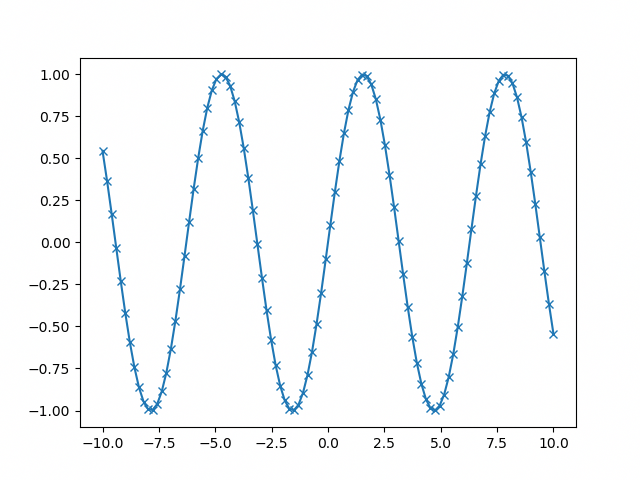

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x, y, marker="x")

In [6]:
from IPython.display import display
import pandas as pd

data = {
    'Name': ["John", "Anna", "Peter", "Linda"],
    'Location': ["New York", "Paris", "Berlin", "London"],
    'Age': [24, 13, 53, 33]
}

data_pandas = pd.DataFrame(data)

display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [10]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [11]:
print("특성의 이름: \n{}".format(iris_dataset['feature_names']))

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [13]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [14]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [16]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [17]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [19]:
print("X_train의 크기: {}".format(X_train.shape))
print("y_train의 크기: {}".format(y_train.shape))

print("X_test의 크기: {}".format(X_test.shape))
print("y_test의 크기: {}".format(y_test.shape))

X_train의 크기: (112, 4)
y_train의 크기: (112,)
X_test의 크기: (38, 4)
y_test의 크기: (38,)


<IPython.core.display.Javascript object>


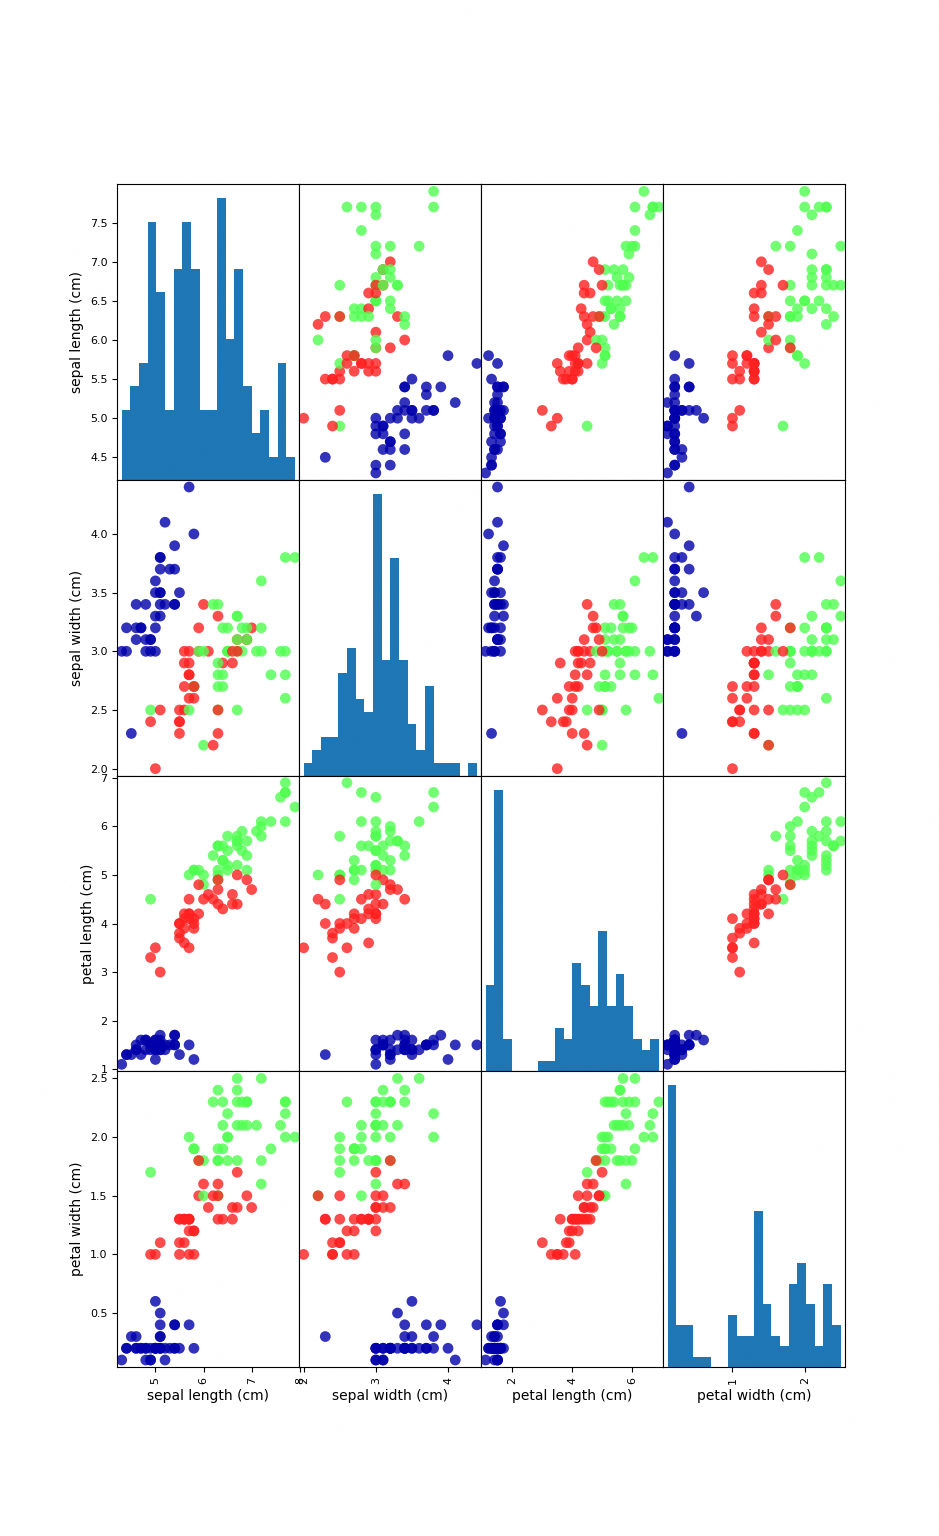

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x31386c6198>,
      dtype=object)

In [20]:
import mglearn

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3
)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [25]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


In [26]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n{}".format(y_pred))

테스트 세트에 대한 예측값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [30]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
